# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [6]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 30.0])            # target position 
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

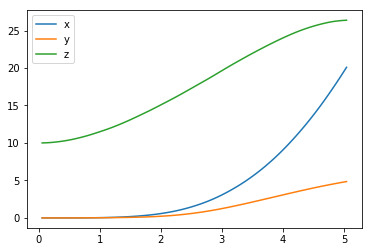

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

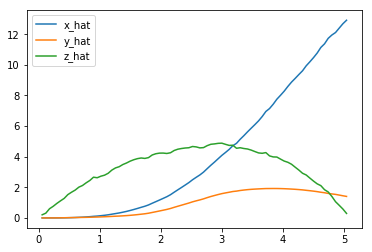

In [8]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

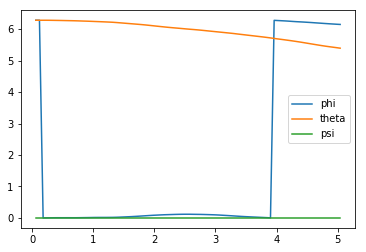

In [9]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

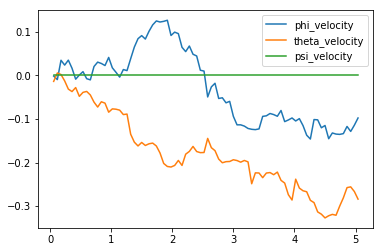

In [10]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

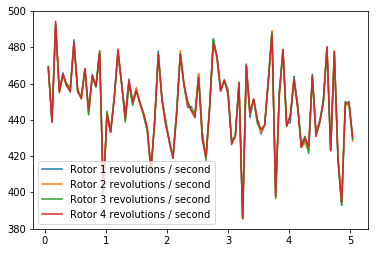

In [11]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [12]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 20.09399006   4.85122093  26.37479046   6.14972284   5.3953569    0.        ]
[ 12.91425227   1.40456939   0.29342288]
[-0.09793288 -0.28388342  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [24]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 500
target_pos = np.array([0., 0., 30.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

all_episodes = []
all_rewards = []
plot_interval = 25

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    results = [state[:3]]
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        results.append(next_state[:3])
        agent.step(reward, done)
        state = next_state
        
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            all_episodes.append(i_episode)
            all_rewards.append(agent.score)
            
            if agent.best_score == agent.score:
                best_results = results
       
            break
            
    sys.stdout.flush()

Episode =  500, score = -43.325 (best = 129.118), noise_scale = 3.25

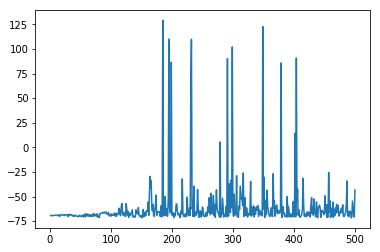

In [25]:
plt.plot(all_episodes, all_rewards, label='Reward')

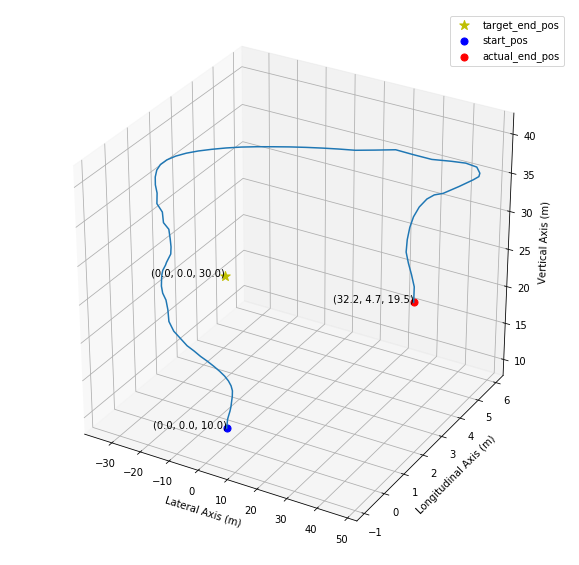

In [26]:
from path import flight_path
if agent.best_score == agent.score:
    results

flight_path(best_results, target_pos)


This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

#### Given I have no prior knowledge in aerodynamics, I learned my basics from this [helpful **post**](http://charlestytler.com/modeling-vehicle-dynamics-6dof-nonlinear-simulation/).

In [33]:
## TODO: Train your agent here.
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sys
import keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib notebook

from agents.agent import DDPGagent
from task import Task

num_episodes = 2000
init_pose = np.array([0., 0., 10., 0., 0., 0.]) 
init_velocities = np.array([0., 0., 0.])        
init_angle_velocities = np.array([0., 0., 0.])  

target_pos = np.array([0., 0., 30.])
task = Task(init_pose=init_pose, target_pos=target_pos, runtime = 5.)
agent = DDPGagent(task) 

all_episodes = []
all_rewards = []
plot_interval = 25

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    results = [state[:3]]
    
    while True:

        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        results.append(next_state[:3])
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")
            all_episodes.append(i_episode)
            all_rewards.append(agent.score)
            if agent.best_score == agent.score:
                best_path = path   
            break
    sys.stdout.flush()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode = 2000, score = 161.698 (best = 162.913), noise_scale = 3.21

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

#### The code for plotting a 3D graph below was inspired by Section 16.8 Thermal Soaring of the [text book](https://drive.google.com/file/d/1xeUDVGWGUUv1-ccUMAZHJLej2C7aAFWY/view) and [Ion Scerbatiuc](https://selfcodex.com/) with reference to Matplotlib's [mplot3dAPI documentation](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/api.html)

<IPython.core.display.Javascript object>


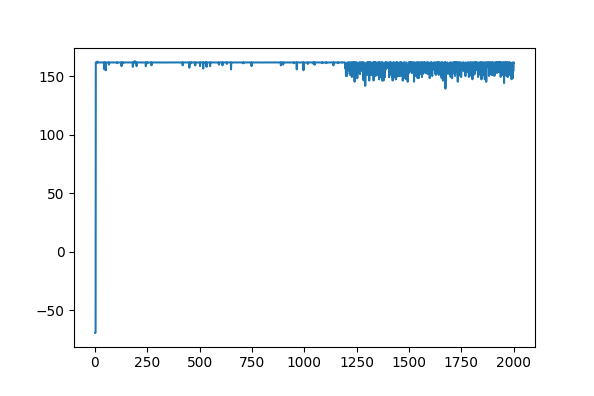

In [36]:
## TODO: Plot the rewards.
plot_interval = 100
plt.plot(all_episodes[:], all_rewards[:], label='Reward')

<IPython.core.display.Javascript object>


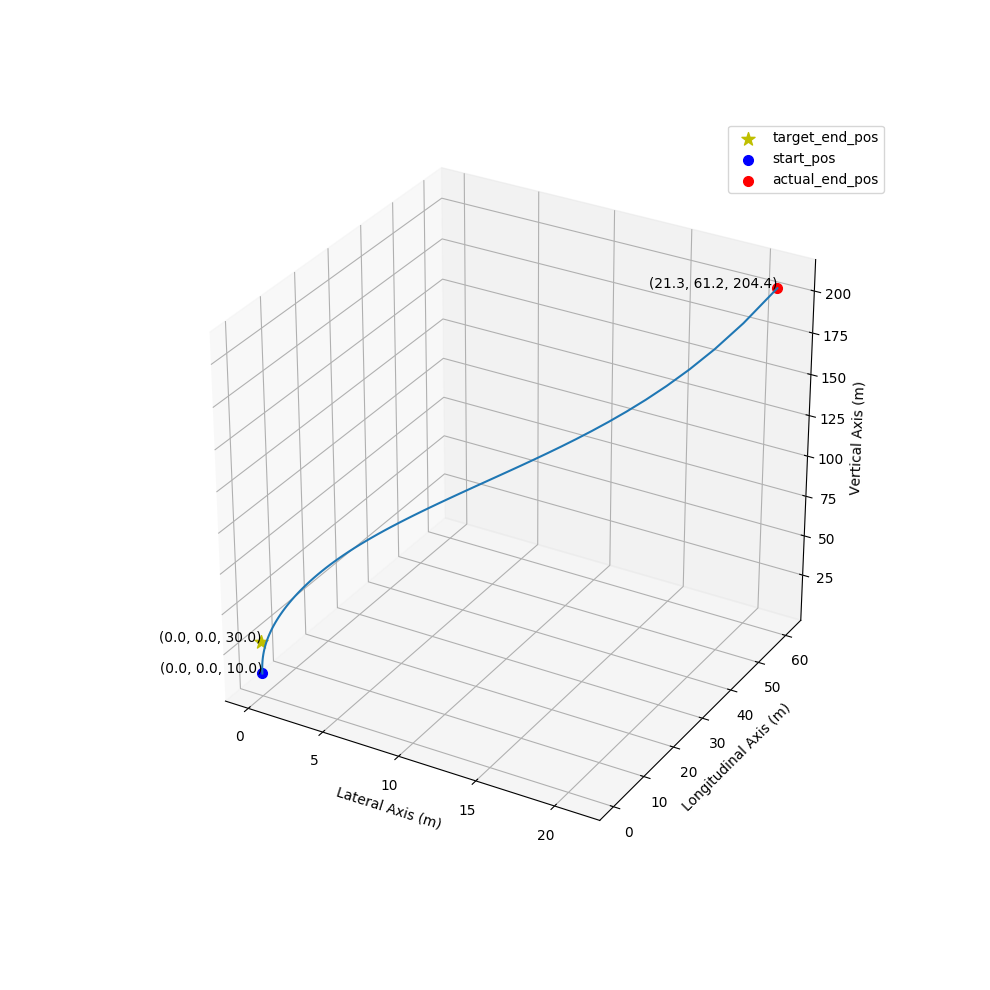

In [37]:
flight_path(results, target_pos) 

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task I chose is 'takeoff' - the first step of a flying quadcopter. Takeoff is given the narrowest definition for simplicity, i.e. the quadcopter's position moved vertically up only from 10m above the ground to 30m. 

To define the reward function, I first considered different scenarios where the quadcopter could do: 
- moving along all three axes or 6DOF (change in distance, velocity and euler angles); 
- drift around on the xy plane without verticle movement; 
- take a long time to move at all

To interprete this scenarios in rewards, I originally did a positive upwards accumulated reward system by at the combined z-axis location and z-axis velocities until I remembered most of the course materials and the examples in the text book were negative rewards unless reaching the terminal state. I think this is because Sutton had this idea of agent learns quickly in the 'world of pain'. Realistically I think agents learn more quickly and coverges more easily if the rewards were negative. In a upward positive reward system the agent may end up never go to the terminal state but continuously accruing ever so positive reward. As a result, I give negative rewards to z-axis below target, and a massive positive reward if it reaches target or above with respect to z-axis. 

I also want to address the scenario where the vehicle only hovers around the xy plane without moving upwards, again, negative reward is given for positive distance change on x-axis and y-axis. 

If the agent is taking too long to learn the runtime would be over run and reset so I did not do anything further on the the timing. Otherwise I would also give negative reward for taking too long to take up. 

**Update**: after running the policy_search Agency a few times, I noted that the agent never got the massive rewards. I therefore took out the punishment for hovering horizontally which seemed to have helped. 



**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

- I used DDPG following the Lillicrap paper following its appendix 1 as closely as possible for hyperparam settings with added on suggestions on Batchnormalisation and regularizers. These settings made the calculation very slow. I also included deep neural networks for actor and critic. However i noticed this complex algorithms at best was performing marginally better than the naive policy search agent. I therefore simplified many aspects of the algo used by reducing number of batch normalisation and regularizers and increasing the dropout rate and learning rate. It proved working much better! So complexity is not necessarily helpful.   


- Below are my hyperparams choice (largely follow Lillicrap unless tweaked): 
  tau (soft target update rate) = 0.001  
  learning rate for the actor was increased from 10e(-4) to 0.01  
  learning rate for the critic was increased from 10e(-3) to 0.1  
  discount rate gamma = 0.99  
  memory buffer size = reduced from 10e6 to10k  
  
  
- Yes, deep neural network layers were used for both actor and critic.3 and 4 hidden layers for actor and critic respectively were used. For each hidden layer either 64 or 128 nodes were applied increased from previously 32 to 64.I also incrased dropout rate from 0.2 to 0.5 to increase calculation speed.ReLU activation for hidden layers and tanh function is used for the final layer for actor as suggested by the paper. 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- the task is the first step of a flying quadcopter. I don't think it should be a difficult task, especially after i narrowed the definition down to just a positive distance change along z-axis. But the agent struggled to learn.It also probably has to do with my reward functions which only asked the agent to maximise the reward if it flies above 30m which it did as can be seen in the second 3D diagram. It did not just take off, it shot off basically. Some further work would be required here.   


- i think the massive reward for reaching the not very high goal really helped the learning, i.e. once the agent got it once it seems to learn well.   


- interestingly, I discovered the performance improvedment because I wanted to draw the 3D graph as shown in section 16.8 of the text book (example on thermal soaring). I got frustrated with the slow calculation with DDPG, so I decided to try the drawing on the simple policy_search agent first and reduced the episodes from 1000 to 500. Everytime I try to rerun to draw the 3D path, the performance seems to get better with once or twice receiving the massive rewards and did better than DDPG. This made me think perhaps the number of episodes matters and less restrictive reward function would also help. Once the 3D diagram is done, I notice the simple model is doing better than DDPG which lead me to increase episodes from 500 to 2000 and simplify DDPG's neural network algo as well and ultimately led to a better result.  


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- for me to start the project was very hard. Aerodynamics is a field very far from international taxation (my profession)! I had to read a lot to get the basic understanding but I am so glad I did and it was really interesting. I think the task looked very daunting at the start but once I got a hang of it I realised how much helper code is already done by Udacity to help us! I also found many useful papers along the way. Even I don't understand them in every detail, every paper helped me a little bit or gave me some idea!


- as already detailed above, i discovered that the agent behaved better because I wanted to draw the flight path in 3D instead of just a reward plot. Meanwhile I think, although I am not certain, if the agent learns about the massive reward it tends to go back and do it over and over again, but if it doesn't at the beginning it is unlikely will learn later. It's almost like a 'sticky effect' as if it jumped high onceearly it may well on its way out but if it failed at the beginning it became lazy and frustrated, so even more unlikely to jump high and get out. It may be due to the exploitation / exploration trade off or maybe it's just the number of episodes one has to run. 

Overall, I enjoyed this project tremendously and wished I had more time to explore. Thank you. 